In [457]:
# Кравцов Андрей ИУ5-64Б Вариант 10
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('bitcoin_prise.csv')
data.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,29.06.2022,"20.083,8","20.278,0","20.384,2","19.915,0","89,56K","-0,96%"
1,28.06.2022,"20.278,0","20.727,9","21.200,2","20.210,5","83,83K","-2,18%"
2,27.06.2022,"20.730,2","21.037,7","21.497,5","20.568,0","84,69K","-1,49%"
3,26.06.2022,"21.043,5","21.489,9","21.837,4","20.989,7","67,21K","-2,08%"
4,25.06.2022,"21.489,9","21.226,9","21.553,4","20.917,5","66,63K","1,24%"


In [458]:
data.columns

Index(['Дата', 'Цена', 'Откр.', 'Макс.', 'Мин.', 'Объём', 'Изм. %'], dtype='object')

In [459]:
# превратим дату в индекс и сделаем изменение постоянным
data.set_index('Дата', inplace = True)
data.head()

,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
Дата,,,,,,
29.06.2022,"20.083,8","20.278,0","20.384,2","19.915,0","89,56K","-0,96%"
28.06.2022,"20.278,0","20.727,9","21.200,2","20.210,5","83,83K","-2,18%"
27.06.2022,"20.730,2","21.037,7","21.497,5","20.568,0","84,69K","-1,49%"
26.06.2022,"21.043,5","21.489,9","21.837,4","20.989,7","67,21K","-2,08%"
25.06.2022,"21.489,9","21.226,9","21.553,4","20.917,5","66,63K","1,24%"


In [460]:
# превратим дату (наш индекс) в объект datetime
data.index = pd.to_datetime(data.index)
data.head()

/var/folders/4y/p87s1yh95fv30_jv69hqpj3w0000gn/T/ipykernel_69637/1898924544.py:2: UserWarning: Parsing '29.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data.index = pd.to_datetime(data.index)
/var/folders/4y/p87s1yh95fv30_jv69hqpj3w0000gn/T/ipykernel_69637/1898924544.py:2: UserWarning: Parsing '28.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data.index = pd.to_datetime(data.index)
/var/folders/4y/p87s1yh95fv30_jv69hqpj3w0000gn/T/ipykernel_69637/1898924544.py:2: UserWarning: Parsing '27.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data.index = pd.to_datetime(data.index)
/var/folders/4y/p87s1yh95fv30_jv69hqpj3w0000gn/T/ipykernel_69637/1898924544.py:2: UserWarning: Parsing '26.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data.index =

,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
Дата,,,,,,
2022-06-29,"20.083,8","20.278,0","20.384,2","19.915,0","89,56K","-0,96%"
2022-06-28,"20.278,0","20.727,9","21.200,2","20.210,5","83,83K","-2,18%"
2022-06-27,"20.730,2","21.037,7","21.497,5","20.568,0","84,69K","-1,49%"
2022-06-26,"21.043,5","21.489,9","21.837,4","20.989,7","67,21K","-2,08%"
2022-06-25,"21.489,9","21.226,9","21.553,4","20.917,5","66,63K","1,24%"


In [461]:
data.dtypes

Цена      object
Откр.     object
Макс.     object
Мин.      object
Объём     object
Изм. %    object
dtype: object

In [462]:
data.drop('Откр.', inplace=True, axis=1)
data.drop('Макс.', inplace=True, axis=1)
data.drop('Мин.', inplace=True, axis=1)
data.drop('Объём', inplace=True, axis=1)
data.drop('Изм. %', inplace=True, axis=1)


In [463]:
data.head()

,Цена
Дата,
2022-06-29,"20.083,8"
2022-06-28,"20.278,0"
2022-06-27,"20.730,2"
2022-06-26,"21.043,5"
2022-06-25,"21.489,9"


In [464]:
formatedData = []
for item in data['Цена']:
    formatedData.append(str(item).split(',')[0].replace('.',''))

data['Цена'] = pd.to_numeric(formatedData)
data.head()

,Цена
Дата,
2022-06-29,20083
2022-06-28,20278
2022-06-27,20730
2022-06-26,21043
2022-06-25,21489


In [465]:
round(data.isna().sum()/(data.count()+data.isna().sum()), 2) * 100

Цена    0.0
dtype: float64

<AxesSubplot:xlabel='Дата'>

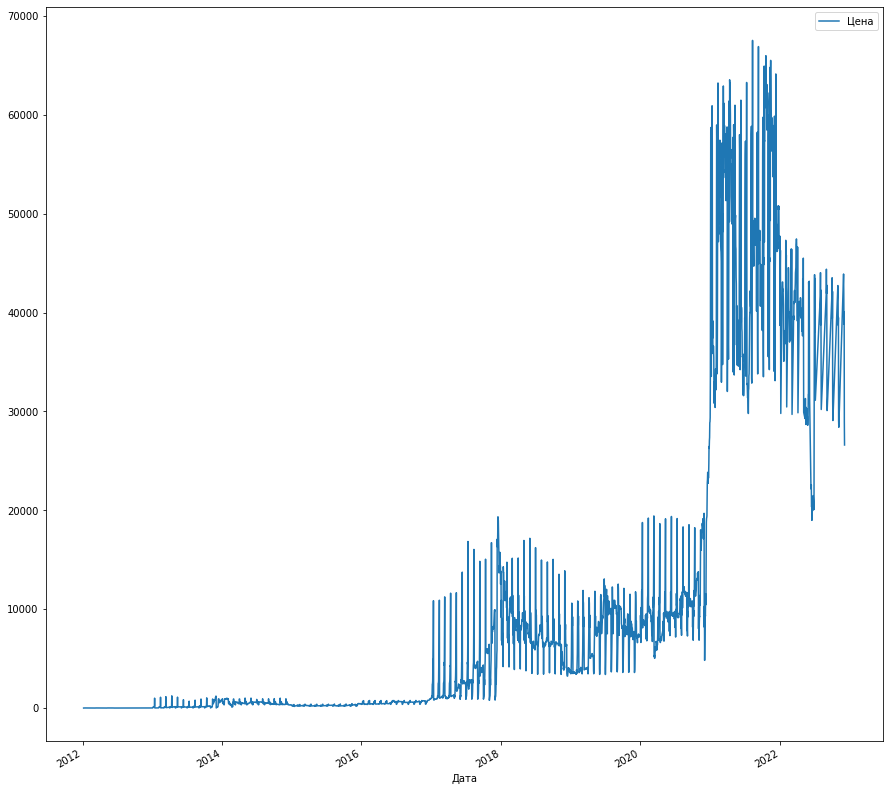

In [466]:
data.plot()

In [467]:
data = data.sort_values(by='Дата', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

In [468]:
data.describe

<bound method NDFrame.describe of              Цена
Дата             
2012-01-06      5
2012-01-07      6
2012-01-08      9
2012-01-09     10
2012-01-10     12
...           ...
2022-12-02  42205
2022-12-03  38814
2022-12-04  40078
2022-12-05  28976
2022-12-06  26606

[3684 rows x 1 columns]>

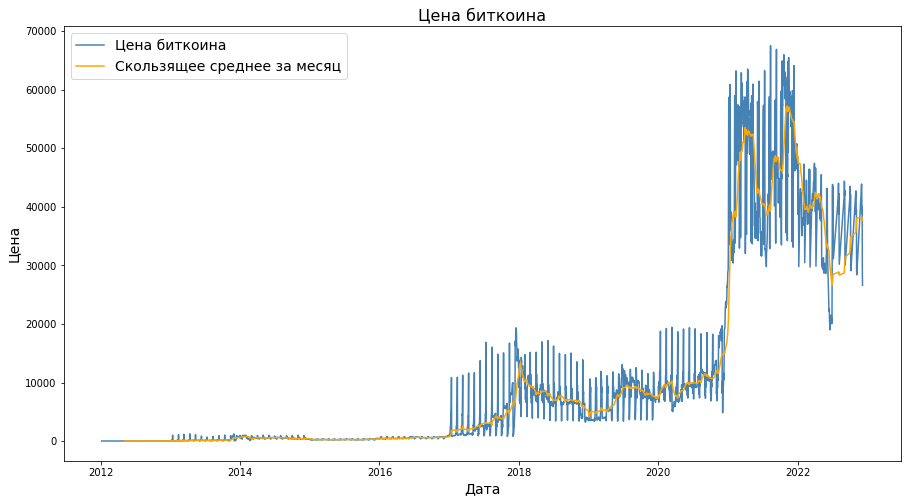

In [469]:
plt.figure(figsize = (15,8))

plt.plot(data, label = 'Цена биткоина', color = 'steelblue')
plt.plot(data.rolling(window = 30).mean(), label = 'Скользящее среднее за месяц', color = 'orange')

# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)

# добавим подписи к осям и заголовки
plt.ylabel('Цена', fontsize = 14)
plt.xlabel('Дата', fontsize = 14)
plt.title('Цена биткоина', fontsize = 16)

# выведем обе кривые на одном графике
plt.show()

In [470]:
# data.to_csv('file.csv') 
data.dtypes

Цена    int64
dtype: object

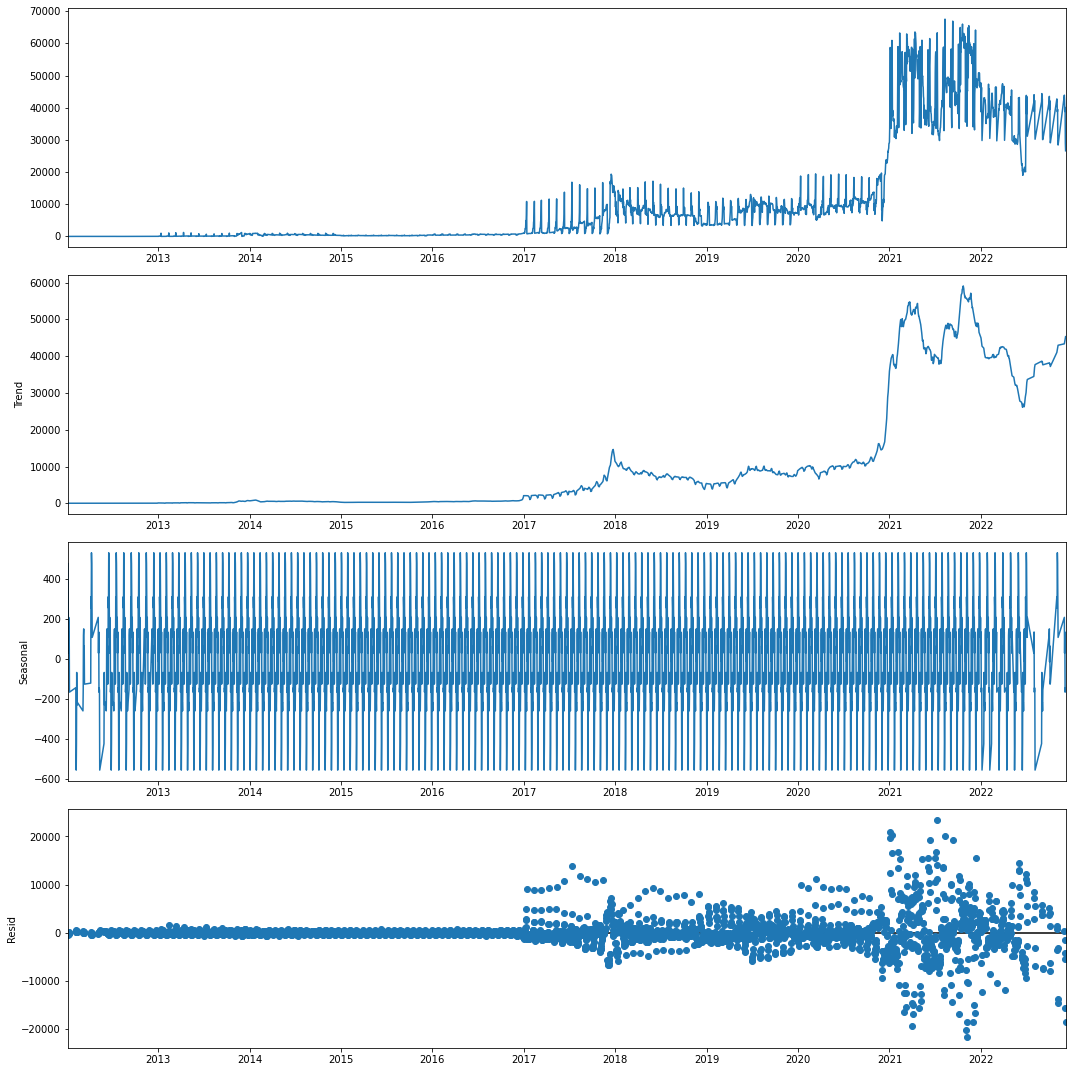

In [471]:
import statsmodels as sm
import statsmodels.api as sm

# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

# применяем функцию к данным о перевозках
decompose = sm.tsa.seasonal_decompose(data, model='additive', filt=None,extrapolate_trend='freq',  period=25)
decompose.plot()

plt.show()

In [472]:
# проведем тест Дики-Фуллера

from statsmodels.tsa.stattools import adfuller

# передадим ей столбец с данными о перевозках и поместим результат в adf_test
adf_test = adfuller(data['Цена'])

# выведем p-value
print('p-value = ' + str(adf_test[1]))

p-value = 0.9541840487229982


p-value = 0.9541840487229982
Результат существенно больше 5%. Временной ряд не стационарен. 

Проведем автокорреляцию - процес, показывающий степень взаимосвязи в одной и той же переменной в разные моменты времени.

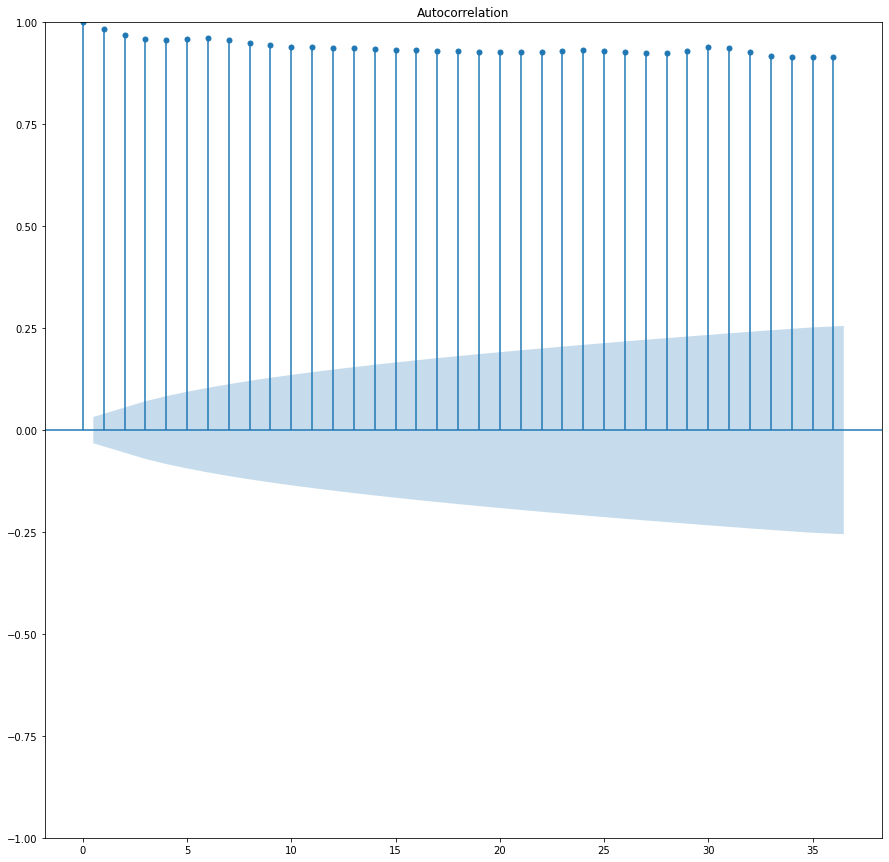

In [473]:
from statsmodels.graphics.tsaplots import plot_acf
 
plot_acf(data)
plt.show()

In [474]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Разделим выборку на обучающую и тестовую: 70% к 30%.
# Целочисленная метка шкалы времени 
xnum = list(range(data.shape[0]))
# Разделение выборки на обучающую и тестовую
Y = data['Цена'].values
train_size = int(len(Y) * 0.7)
xnum_train, xnum_test = xnum[0:train_size], xnum[train_size:]
train, test = Y[0:train_size], Y[train_size:]
history_arima = [x for x in train]
history_es = [x for x in train]

In [475]:
# Создадим предсказания модели.
# Параметры модели (p,d,q) 
arima_order = (6, 1, 0)
# Формирование предсказаний
predictions_arima = list()
for t in range(len(test)):
    model_arima = sm.tsa.arima.ARIMA(history_arima, order=arima_order)
    model_arima_fit = model_arima.fit()
    yhat_arima = model_arima_fit.forecast()[0]
    predictions_arima.append(int(yhat_arima))
    history_arima.append(test[t])
# Записываем предсказания в DataFrame
data['predictions_ARIMA'] = (train_size * [np.NAN]) + list(predictions_arima)

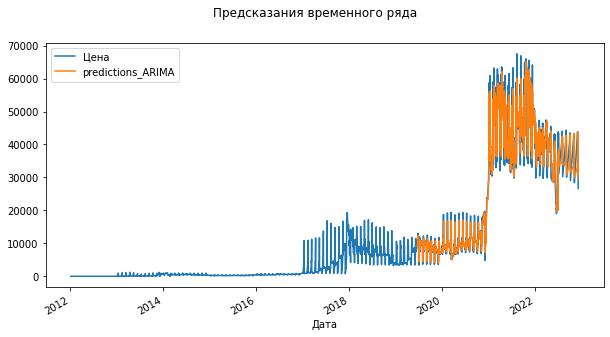

In [476]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда')
data.plot(ax=ax, legend=True)
pyplot.show()

In [477]:
from sklearn.metrics import r2_score, mean_squared_error
error_arima_mse = mean_squared_error(test, predictions_arima, squared=False)
print("MSE:",error_arima_mse)
error_arima_r2 = r2_score(test, predictions_arima)
print("R2:",error_arima_r2)
# Согласно метрикам прогноз не является точным - огромная среднеквадратическая ошибка, но зато коэффициент детерминации близок к 1.
# Попробуем спрогнозировать выборку данной моделью на 2 месяца вперед.

MSE: 4425.983006229077
R2: 0.943164463390323


In [478]:
a = pd.to_datetime("2022-12-06")
new_dates_list = []
# Параметры модели (p,d,q) 
arima_order = (6, 1, 0)
# Формирование предсказаний
predictions_arima = list()
for t in range(60):
    new_dates_list.append(a)
    a = a + pd.Timedelta("1 day")
    model_arima = sm.tsa.arima.ARIMA(history_arima, order=arima_order)
    model_arima_fit = model_arima.fit()
    yhat_arima = model_arima_fit.forecast()[0]
    predictions_arima.append(int(yhat_arima))
    history_arima.append(test[t])
print(len(predictions_arima))
print(len(new_dates_list))

60
60


In [479]:


pred = pd.DataFrame({'Date': new_dates_list, "Prise": predictions_arima})
# превратим дату в индекс и сделаем изменение постоянным
pred.set_index('Date', inplace = True)
pred.head()

,Prise
Date,
2022-12-06,32429
2022-12-07,16752
2022-12-08,17955
2022-12-09,16857
2022-12-10,14015


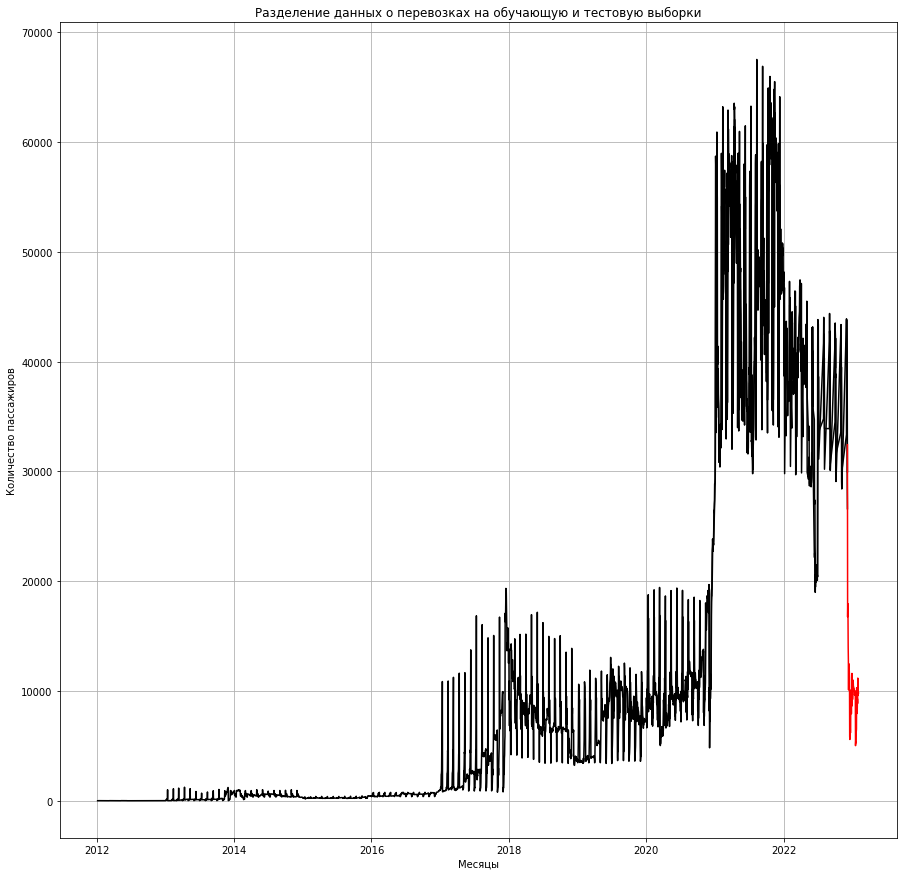

In [480]:
plt.plot(data, color = "black")
plt.plot(pred, color = "red")
 
# заголовок и подписи к осям
plt.title('Разделение данных о перевозках на обучающую и тестовую выборки')
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')
 
# добавим сетку
plt.grid()
 
plt.show()

In [481]:
train = data[:'2022-06-06']
test = data['2018-11-02':]
# from sklearn.model_selection import train_test_split
# y = data['Цена']
# X = data['Дата']
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)


In [482]:
train = train.drop('predictions_ARIMA', 1)
data = data.drop('predictions_ARIMA', 1)
# train = data 
train.head()

/var/folders/4y/p87s1yh95fv30_jv69hqpj3w0000gn/T/ipykernel_69637/1555759479.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train = train.drop('predictions_ARIMA', 1)
/var/folders/4y/p87s1yh95fv30_jv69hqpj3w0000gn/T/ipykernel_69637/1555759479.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('predictions_ARIMA', 1)


,Цена
Дата,
2012-01-06,5
2012-01-07,6
2012-01-08,9
2012-01-09,10
2012-01-10,12


In [483]:
train.dtypes
train.index = pd.DatetimeIndex(train.index).to_period('D')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:xlabel='Дата'>

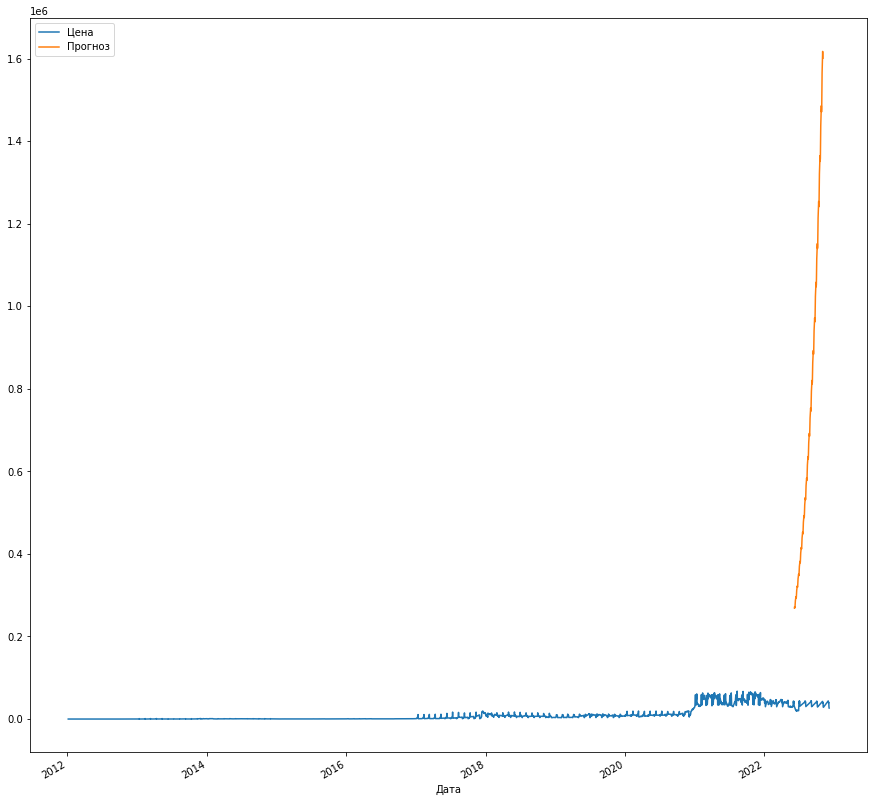

In [484]:
fitted_model = ExponentialSmoothing(train, trend = 'mul', seasonal = 'mul').fit()
test_predictions = fitted_model.forecast(150)
data.plot(legend = True, label = 'Тренировочные данные')
test_predictions.plot(legend = True, label = 'Прогноз')

In [488]:
test = test.drop('predictions_ARIMA', 1)

/var/folders/4y/p87s1yh95fv30_jv69hqpj3w0000gn/T/ipykernel_69637/1779453748.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test = test.drop('predictions_ARIMA', 1)


In [497]:
test_predictions= list(map(int,test_predictions))

In [501]:
test_predictions = fitted_model.forecast(1336)
error_exp_smooth_mse = mean_squared_error(test, test_predictions, squared=False)
print("MSE:",error_exp_smooth_mse)
error_exp_smooth_r2 = -r2_score(test, test_predictions)
print("R2:",error_exp_smooth_r2)

MSE: 505406890400.41296
R2: 732379526373400.6


тут все плохо, данный метод прогноза не подходит под временной ряд